# Decision trees

Knowledge-based systems represent knowledge explicitly, as a set of rules, rather than being implicit in algorithms.  

The **decision-tree** displays a flow of conditional statements (i.e., `if Condition then Outcome`) where:

* Each **node** represents a test on a feature
* Each **branch** represents the outcome of the test
* Each **leaf** represents the outcome or decision.  

There are a number of tree algorithms, including:
* **Iterative Dichotomiser 3 (ID3)**, for classification using categorical features
* **C4.5**, extends ID3 to support non-categorical features
* **Classification and Regression Trees (CART)**, generalizes C4.5 to support regression.

We follow ID3 ([Quinlan, 1986][1]), for binary classification using categorical features with a small set of possible values (i.e., low cardinality).  

[1]: http://hunch.net/~coms-4771/quinlan.pdf "Quinlan, J. 1986. Induction of Decision Trees. Machine Learning 1: 81-106."

Therefore, we recursively repeat the process in each partition until we get homogenous (i.e., single-class) leafs:

```
ID3 (Data, Target, Attributes)
    If all examples are positive, Return the single-node tree Root, with label = 1.
    If all examples are negative, Return the single-node tree Root, with label = 0.
    Otherwise Begin
        A <- Pick the Attribute that best classifies examples.
        Decision tree for Root = A.
        For each possible value, v_i, of A,
            Add a new tree branch, corresponding to the test A = v_i.
            Let Data(v_i) be the subset of examples that have the value v_i for A.
            Below this new branch add the subtree ID3 (Data(v_i), Target, Attributes – {A}).
    End
    Return Root
```




## Implementation

In [4]:
from math import log2

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from IPython.display import Image

from utils.utils import *

In [5]:
data = make_data()

In [6]:
X, y = separate_target_variable(data)

In [7]:
X_ = process_categorical_features(X)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

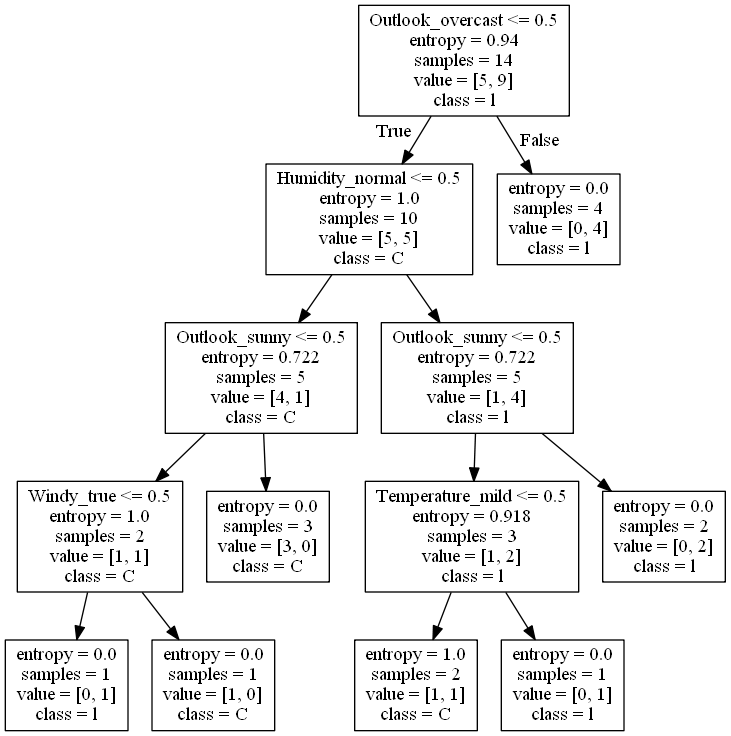

In [8]:
t = visualize_tree(clf, X_.columns, y.name)
Image(t)

### Decision tree regression

For regression, you should use the `DecisionTreeRegressor` (again, refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)).

### Feature importance


In [9]:
feature_importances = pd.Series(data=clf.feature_importances_, index=X_.columns)
feature_importances.sort_values(ascending=False)

Outlook_overcast    0.283411
Humidity_normal     0.249079
Outlook_sunny       0.220745
Windy_true          0.179147
Temperature_mild    0.067618
Windy_false         0.000000
Humidity_high       0.000000
Temperature_hot     0.000000
Temperature_cool    0.000000
Outlook_rain        0.000000
dtype: float64